In [98]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [99]:
f = fits.open(r"D:\Astro\20220711-M13-OAG-Test\M13-Light\Light_ASIImg_90sec_Bin1_-0.3C_gain120_2022-07-10_232701_frame0001.fit")

In [100]:
ph = f[0]


In [101]:
for k,v in ph.header.items():
  print(k,v)

SIMPLE True
BITPIX 16
NAXIS 2
NAXIS1 4144
NAXIS2 2822
EXTEND True
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H
BZERO 32768
BSCALE 1
XBINNING 1
YBINNING 1
EXPOINUS 90000000
GAIN 120
OFFSET 30
WB_RED 50
WB_BLUE 50
CBLACK 0
CWHITE 65535
PEDESTAL 0
SWCREATE ASIImg
SWOWNER ZWO
DATE-OBS 2022-07-11T03:27:01.727
BAYERPAT RGGB
COLORTYP RAW16
INPUTFMT FITS
INSTRUME ZWO ASI294MC Pro
XPIXSZ 4.63
YPIXSZ 4.63
EXPTIME 90.0
EXPOSURE 90.0
CCD-TEMP -0.3


In [102]:
img = ph.data

In [103]:
img.dtype, img.shape

(dtype('uint16'), (2822, 4144))

In [104]:
assert(img.shape[0]==ph.header['NAXIS2'])
assert(img.shape[1]==ph.header['NAXIS1'])

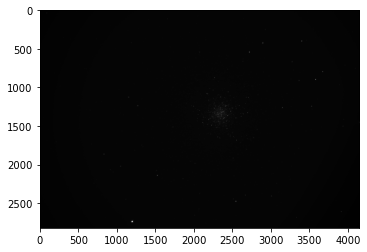

In [105]:
plt.imshow(ph.data, cmap='gray')

In [106]:
np.min(img), np.max(img), np.std(img), np.mean(img), np.median(img)

(2072, 65532, 692.3065073443322, 3394.650009303624, 3388.0)

In [107]:
def norm(img):
  img = img - np.min(img)
  img = img / np.max(img)
  return img

In [108]:
def debayer(img, method=cv2.COLOR_BAYER_BG2RGB):
  deb = cv2.cvtColor(img, method)
  norm_deb = np.stack([norm(deb[:,:,0]), norm(deb[:,:,1]), norm(deb[:,:,2])], axis=2)
  return norm_deb.astype(np.float32)

cv2.imwrite(r"C:\Users\anand\Desktop\output-default.tif", debayer(img, cv2.COLOR_BAYER_BG2RGB))
cv2.imwrite(r"C:\Users\anand\Desktop\output-ea.tif", debayer(img, cv2.COLOR_BAYER_BG2RGB_EA)) ## Edge aware
#cv2.imwrite(r"C:\Users\anand\Desktop\output-vng.tif", debayer(img, cv2.COLOR_BAYER_BG2RGB_VNG))

True

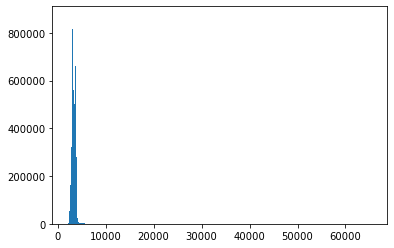

In [11]:
a,b,c = plt.hist(img.ravel(), bins=1000)

In [12]:
h = img.shape[0]
w = img.shape[1]

In [13]:
r = img[0:h:2, 0:w:2]
b = img[1:h:2, 1:w:2]
g1 = img[0:h:2, 1:w:2]
g2 = img[1:h:2, 0:w:2]
g = (g1+g2)/2

In [14]:
assert(r.shape==b.shape)
assert(r.shape==g.shape)

'min:0.0, max:1.0, mean:0.014313085883669571'

'min:0.0, max:1.0, mean:0.022982196017207704'

'min:0.0, max:1.0, mean:0.022872054356929974'

'min:0.0, max:1.0, mean:0.01851778498983309'

'min:0.0, max:1.0, mean:0.10826661722557346'

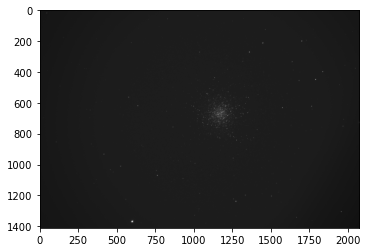

In [21]:
def info(img):
  plt.imshow(img, cmap='gray')
  display(f"min:{np.min(img)}, max:{np.max(img)}, mean:{np.mean(img)}")

info(norm(r))
info(norm(g1))
info(norm(g2))
info(norm(b))
info(norm(g))

In [17]:
cimg = np.stack([norm(r), norm(g), norm(b)], axis=2)

In [18]:
cimg.shape

(1411, 2072, 3)

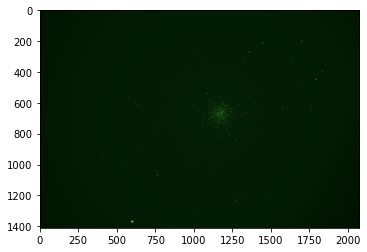

In [19]:
plt.imshow(cimg)
plt.imsave(r"C:\Users\anand\Desktop\output.png", cimg, dpi=300)

In [20]:
cv2.imwrite(r"C:\Users\anand\Desktop\output.tif", cimg.astype(np.float32))

True